In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use(['ggplot','bmh'])
import pandas_datareader.data as web
import datetime as dt
import fix_yahoo_finance as yf
yf.pdr_override()
%matplotlib inline

In [8]:
all_tickers = ['ABCN.V', 'ACB.TO', 'ACG.CN', 'APH.TO', 'APP.CN', 'ATT.CN', 'AXIM', 'BCC.CN', 'BE.CN', 'BLO.CN', 'CBDS', 'CBIS', 'CBW.V', 'CMED.TO', 'CNBX', 'CRZ.CN', 'CVSI', 'DOJA.CN', 'EAT.CN', 'EMH.V', 'FFT.CN',\
               'FIRE.V', 'GHG.CN', 'GLH.CN', 'GWPH', 'HC.CN', 'HEMP.V', 'HIP.V', 'HVST.V', 'IAN.CN', 'ICC.V', 'IIPR', 'IMH.V', 'IN.CN', 'INSY', 'ISOL.CN', 'J.CN', 'KSHB', 'LEAF.TO', 'LXX.CN', 'MCOA', 'MDM.CN', 'MGW.V',\
			   'MJ.CN', 'MJN.V', 'MJNA', 'MPX.CN', 'MRMD', 'N.CN', 'NINE.V', 'NSP.V', 'OGI.V', 'PMCB', 'PUF.CN', 'QCC.CN', 'RTI.V', 'SCYB.V', 'SLTK', 'SMG', 'SRNA', 'SUN.CN', 'TBP.V', 'TER.CN', 'TGIF.CN',\
			   'THC.CN', 'THCX.V', 'TNY.CN', 'TRST.CN', 'TRTC', 'VGW.CN', 'VP.CN', 'VRT.CN', 'WEED.TO', 'WMD.V']

start = dt.datetime(2012, 1, 1)
end = dt.datetime(2018, 1, 8)

def get(tickers, startdate, enddate):
  def data(tickers):
    return (web.get_data_yahoo(tickers, start=startdate, end=enddate))
  datas = map(data, tickers)
  return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

tickers = get(all_tickers, start, end)
tickers.to_csv('tickers.csv')
print('The dope has been downloaded')



[*********************100%***********************]  1 of 1 downloadedThe dope has been downloaded


In [31]:
df = pd.read_csv('tickers.csv')
df['Date'] = pd.to_datetime(df['Date'])
df['Ticker'] = df['Ticker'].astype('category')
df = df.drop(['Close','High','Low','Open','Volume'], 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34828 entries, 0 to 34827
Data columns (total 3 columns):
Ticker       34828 non-null category
Date         34828 non-null datetime64[ns]
Adj Close    34828 non-null float64
dtypes: category(1), datetime64[ns](1), float64(1)
memory usage: 581.3 KB


In [32]:
df = df.pivot(index='Date', columns='Ticker', values='Adj Close')
df.head()

Ticker      ABCN.V  ACB.TO  ACG.CN  APH.TO  APP.CN  ATT.CN  AXIM  BE.CN  \
Date                                                                      
2012-01-03     NaN     NaN     NaN     1.6     NaN     NaN   NaN    NaN   
2012-01-04     NaN     NaN     NaN     1.6     NaN     NaN   NaN    NaN   
2012-01-05     NaN     NaN     NaN     1.6     NaN     NaN   NaN    NaN   
2012-01-06     NaN     NaN     NaN     1.6     NaN     NaN   NaN    NaN   
2012-01-09     NaN     NaN     NaN     1.6     NaN     NaN   NaN    NaN   

Ticker      BLO.CN  CBDS  ...    THC.CN  THCX.V  TNY.CN  TRST.CN  TRTC  \
Date                      ...                                            
2012-01-03     NaN   NaN  ...       NaN     NaN     NaN      NaN   NaN   
2012-01-04     NaN   NaN  ...       NaN     NaN     NaN      NaN   NaN   
2012-01-05     NaN   NaN  ...       NaN     NaN     NaN      NaN   NaN   
2012-01-06     NaN   NaN  ...       NaN     NaN     NaN      NaN   NaN   
2012-01-09     NaN   NaN  ...       NaN     NaN     NaN      NaN   NaN   

Ticker      VGW.CN  VP.CN  VRT.CN  WEED.TO  WMD.V  
Date                                               
2012-01-03     NaN    NaN     NaN     0.12    NaN  
2012-01-04     NaN    NaN     NaN     0.12    NaN  
2012-01-05     NaN    NaN     NaN     0.12    NaN  
2012-01-06     NaN    NaN     NaN     0.12    NaN  
2012-01-09     NaN    NaN     NaN     0.12    NaN  

[5 rows x 73 columns]

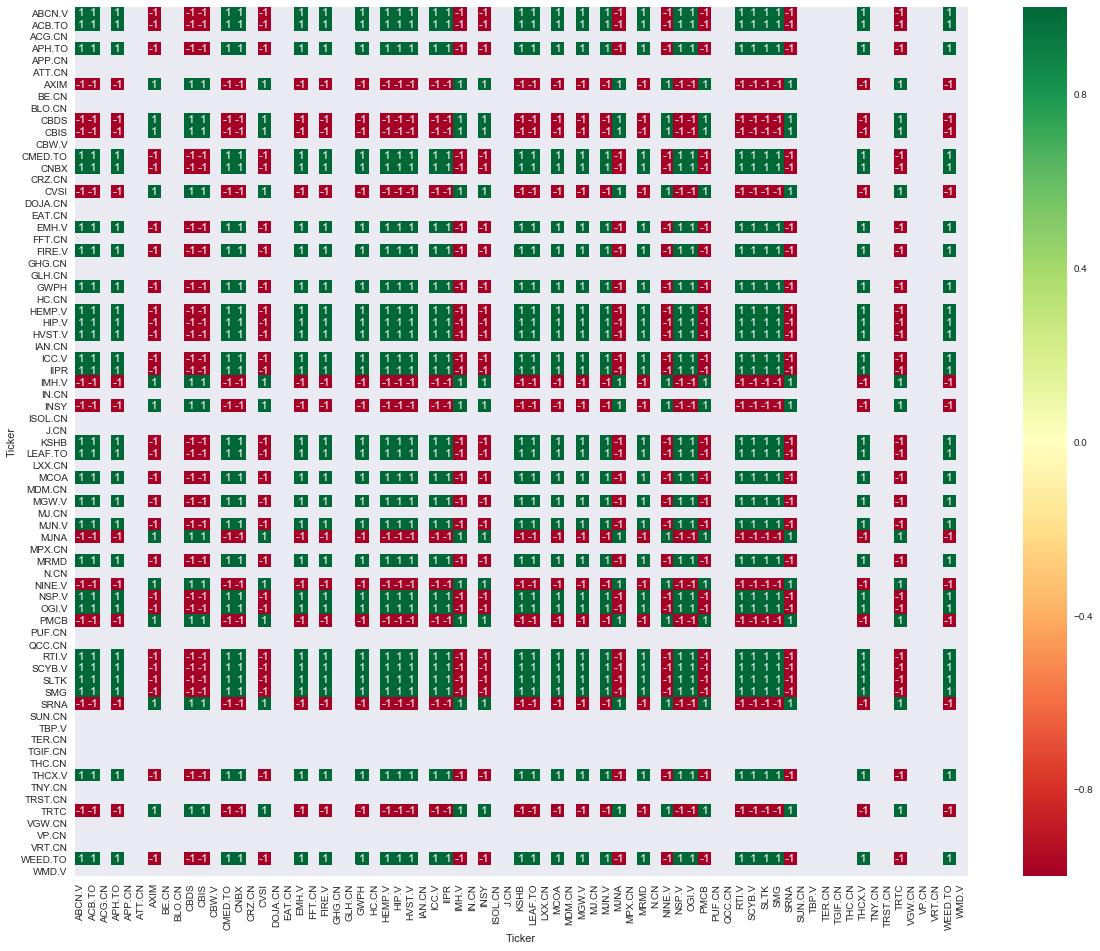

In [67]:
df = df.corr(method='pearson')
sns.set()
matrix = sns.heatmap(df, annot=True, vmin=-1, vmax=1, cmap=plt.cm.RdYlGn)
sns.set(rc={"figure.figsize": (20, 16)})
fig = matrix.get_figure()
fig.savefig('The_Weed_Matrix.png')